## Comparing ZTF and TESS light curves

The goal of this notebook is to:
- Crossmatch [TIC (TESS Input Catalog)](https://tess.mit.edu/science/tess-input-catalogue/) with ZTF DR14.
- Query ZTF sources and TESS on time-domain data for the relevant objects.
- Plot and compare a ZTF light curve against a TESS light curve.

In [ ]:
%pip install git+https://github.com/astronomy-commons/lsdb.git@nested

In [2]:
import lsdb

### Selecting the field of interest

A useful field is the one observed by the Kepler telescope:
- Coordinates: `19:22:40 +44:30:00`.
- A radius of 1 degree, yielding X objects.

Its overlap with TESS is considered in a lot of stellar astro investigations, because Kepler + TESS = a ton of data spanning a 15-year period.

In [3]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from lsdb.core.search import ConeSearch

c = SkyCoord('19:22:40  +44:30:00', unit=(u.hourangle, u.deg))
cone_ra, cone_dec = c.ra.value, c.dec.value
radius_arcsec = 3600 # 1 degree
cone_filter = ConeSearch(cone_ra, cone_dec, radius_arcsec)

In [4]:
cone_ra, cone_dec

(290.6666666666667, 44.5)

### Initializing the Dask client

In [ ]:
from dask.distributed import Client
client = Client(n_workers=8, dashboard_address=":38767")

### Crossmatching TIC with ZTF

In [6]:
tic = lsdb.read_hipscat("https://data.lsdb.io/unstable/tic/tic/", search_filter=cone_filter)
tic

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,Norder,Dir,Npix
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4201858452336672768,int64[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int64[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],string[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],null[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int64[pyarrow],uint8[pyarrow],uint64[pyarrow],uint64[pyarrow]
4251398048237748224,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
ztf = lsdb.read_hipscat("https://data.lsdb.io/unstable/ztf/ztf_dr14/", search_filter=cone_filter)
ztf

/astro/users/smcampos/.conda/envs/busy-week/lib/python3.11/site-packages/hipscat/io/file_io/file_io.py:320: UserWarning: point_map.fits file written in RING ordering, due to https://github.com/astronomy-commons/hipscat/issues/271. Converting to NESTED.
  warnings.warn(


,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix
npartitions=2,,,,,,,,,,,,,,,
4201858452336672768,int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow]
4251398048237748224,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [8]:
tic_x_ztf = tic.crossmatch(ztf, radius_arcsec=1, n_neighbors=1, suffixes=("_tic", "_ztf"))
tic_x_ztf

/astro/users/smcampos/.conda/envs/busy-week/lib/python3.11/site-packages/lsdb/dask/crossmatch_catalog_data.py:108: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,ID_tic,version_tic,HIP_tic,TYC_tic,UCAC_tic,TWOMASS_tic,SDSS_tic,ALLWISE_tic,GAIA_tic,APASS_tic,KIC_tic,objType_tic,typeSrc_tic,ra_tic,dec_tic,POSflag_tic,pmRA_tic,e_pmRA_tic,pmDEC_tic,e_pmDEC_tic,PMflag_tic,plx_tic,e_plx_tic,PARflag_tic,gallong_tic,gallat_tic,eclong_tic,eclat_tic,Bmag_tic,e_Bmag_tic,Vmag_tic,e_Vmag_tic,umag_tic,e_umag_tic,gmag_tic,e_gmag_tic,rmag_tic,e_rmag_tic,imag_tic,e_imag_tic,zmag_tic,e_zmag_tic,Jmag_tic,e_Jmag_tic,Hmag_tic,e_Hmag_tic,Kmag_tic,e_Kmag_tic,TWOMflag_tic,prox_tic,w1mag_tic,e_w1mag_tic,w2mag_tic,e_w2mag_tic,w3mag_tic,e_w3mag_tic,w4mag_tic,e_w4mag_tic,GAIAmag_tic,e_GAIAmag_tic,Tmag_tic,e_Tmag_tic,TESSflag_tic,SPFlag_tic,Teff_tic,e_Teff_tic,logg_tic,e_logg_tic,MH_tic,e_MH_tic,rad_tic,e_rad_tic,mass_tic,e_mass_tic,rho_tic,e_rho_tic,lumclass_tic,lum_tic,e_lum_tic,d_tic,e_d_tic,ebv_tic,e_ebv_tic,numcont_tic,contratio_tic,disposition_tic,duplicate_id_tic,priority_tic,eneg_EBV_tic,epos_EBV_tic,EBVflag_tic,eneg_Mass_tic,epos_Mass_tic,eneg_Rad_tic,epos_Rad_tic,eneg_rho_tic,epos_rho_tic,eneg_logg_tic,epos_logg_tic,eneg_lum_tic,epos_lum_tic,eneg_dist_tic,epos_dist_tic,distflag_tic,eneg_Teff_tic,epos_Teff_tic,TeffFlag_tic,gaiabp_tic,e_gaiabp_tic,gaiarp_tic,e_gaiarp_tic,gaiaqflag_tic,starchareFlag_tic,VmagFlag_tic,BmagFlag_tic,splists_tic,e_RA_tic,e_Dec_tic,RA_orig_tic,Dec_orig_tic,e_RA_orig_tic,e_Dec_orig_tic,raddflag_tic,wdflag_tic,objID_tic,Norder_tic,Dir_tic,Npix_tic,ps1_objid_ztf,ra_ztf,dec_ztf,ps1_gMeanPSFMag_ztf,ps1_rMeanPSFMag_ztf,ps1_iMeanPSFMag_ztf,nobs_g_ztf,nobs_r_ztf,nobs_i_ztf,mean_mag_g_ztf,mean_mag_r_ztf,mean_mag_i_ztf,Norder_ztf,Dir_ztf,Npix_ztf,_dist_arcsec
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4201858452336672768,int64[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int64[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],string[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],null[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int64[pyarrow],uint8[pyarrow],uint64[pyarrow],uint64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double

### Add nested ZTF light curves

In [9]:
ztf_sources = lsdb.read_hipscat(
    "https://data.lsdb.io/unstable/ztf/ztf_zource/", 
    columns=["ps1_objid","ra","dec","mjd","mag","magerr","band"], 
    search_filter=cone_filter
)
ztf_sources

/astro/users/smcampos/.conda/envs/busy-week/lib/python3.11/site-packages/hipscat/io/file_io/file_io.py:320: UserWarning: point_map.fits file written in RING ordering, due to https://github.com/astronomy-commons/hipscat/issues/271. Converting to NESTED.
  warnings.warn(


,ps1_objid,ra,dec,mjd,mag,magerr,band
npartitions=27,,,,,,,
4205587995778088960,int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow]
4205728733266444288,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
4254916485446631424,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...


In [10]:
tic_x_ztf = tic_x_ztf.join_nested(
    ztf_sources, left_on="ps1_objid_ztf", right_on="ps1_objid", nested_column_name="ztf_sources")
tic_x_ztf

/astro/users/smcampos/.conda/envs/busy-week/lib/python3.11/site-packages/lsdb/dask/join_catalog_data.py:291: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,ID_tic,version_tic,HIP_tic,TYC_tic,UCAC_tic,TWOMASS_tic,SDSS_tic,ALLWISE_tic,GAIA_tic,APASS_tic,KIC_tic,objType_tic,typeSrc_tic,ra_tic,dec_tic,POSflag_tic,pmRA_tic,e_pmRA_tic,pmDEC_tic,e_pmDEC_tic,PMflag_tic,plx_tic,e_plx_tic,PARflag_tic,gallong_tic,gallat_tic,eclong_tic,eclat_tic,Bmag_tic,e_Bmag_tic,Vmag_tic,e_Vmag_tic,umag_tic,e_umag_tic,gmag_tic,e_gmag_tic,rmag_tic,e_rmag_tic,imag_tic,e_imag_tic,zmag_tic,e_zmag_tic,Jmag_tic,e_Jmag_tic,Hmag_tic,e_Hmag_tic,Kmag_tic,e_Kmag_tic,TWOMflag_tic,prox_tic,w1mag_tic,e_w1mag_tic,w2mag_tic,e_w2mag_tic,w3mag_tic,e_w3mag_tic,w4mag_tic,e_w4mag_tic,GAIAmag_tic,e_GAIAmag_tic,Tmag_tic,e_Tmag_tic,TESSflag_tic,SPFlag_tic,Teff_tic,e_Teff_tic,logg_tic,e_logg_tic,MH_tic,e_MH_tic,rad_tic,e_rad_tic,mass_tic,e_mass_tic,rho_tic,e_rho_tic,lumclass_tic,lum_tic,e_lum_tic,d_tic,e_d_tic,ebv_tic,e_ebv_tic,numcont_tic,contratio_tic,disposition_tic,duplicate_id_tic,priority_tic,eneg_EBV_tic,epos_EBV_tic,EBVflag_tic,eneg_Mass_tic,epos_Mass_tic,eneg_Rad_tic,epos_Rad_tic,eneg_rho_tic,epos_rho_tic,eneg_logg_tic,epos_logg_tic,eneg_lum_tic,epos_lum_tic,eneg_dist_tic,epos_dist_tic,distflag_tic,eneg_Teff_tic,epos_Teff_tic,TeffFlag_tic,gaiabp_tic,e_gaiabp_tic,gaiarp_tic,e_gaiarp_tic,gaiaqflag_tic,starchareFlag_tic,VmagFlag_tic,BmagFlag_tic,splists_tic,e_RA_tic,e_Dec_tic,RA_orig_tic,Dec_orig_tic,e_RA_orig_tic,e_Dec_orig_tic,raddflag_tic,wdflag_tic,objID_tic,Norder_tic,Dir_tic,Npix_tic,ps1_objid_ztf,ra_ztf,dec_ztf,ps1_gMeanPSFMag_ztf,ps1_rMeanPSFMag_ztf,ps1_iMeanPSFMag_ztf,nobs_g_ztf,nobs_r_ztf,nobs_i_ztf,mean_mag_g_ztf,mean_mag_r_ztf,mean_mag_i_ztf,Norder_ztf,Dir_ztf,Npix_ztf,_dist_arcsec,ztf_sources
npartitions=27,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4205587995778088960,int64[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int64[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],string[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],null[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int64[pyarrow],uint8[pyarrow],uint64[pyarrow],uint64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],double[p

### Add nested TESS light curves

The catalog we here name TESS is a subset of the entire TESS catalog, imported for the specified cone region.

In [11]:
tess = lsdb.read_hipscat("tess")
tess

,TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2,TICID,RA_OBJ,DEC_OBJ,Norder,Dir,Npix
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,
3458764513820540928,double[pyarrow],float[pyarrow],int32[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int32[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],uint8[pyarrow],uint64[pyarrow],uint64[pyarrow]
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


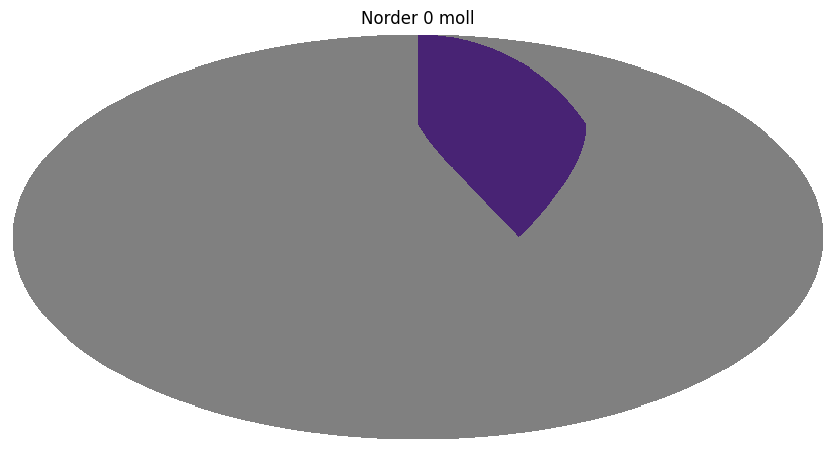

In [12]:
tess.plot_pixels()

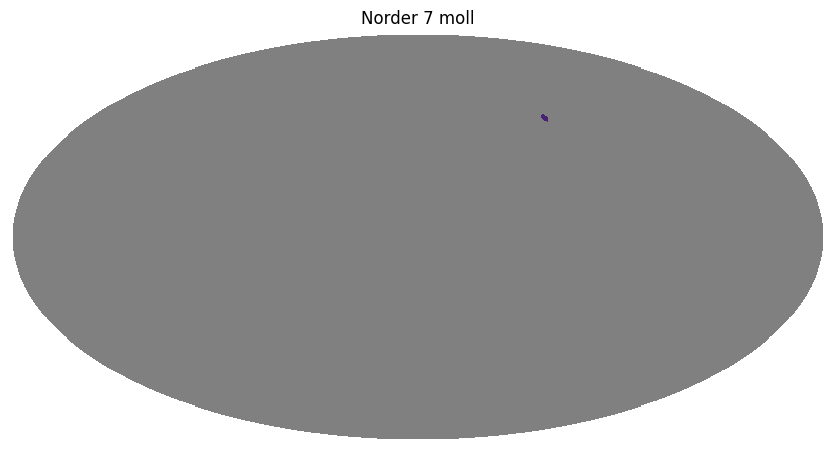

In [13]:
tic_x_ztf.plot_pixels()

In [14]:
tic_ztf_tess_nested = tic_x_ztf.join_nested(
    tess, left_on="ID_tic", right_on="TICID", nested_column_name="tess_sources")
tic_ztf_tess_nested

/astro/users/smcampos/.conda/envs/busy-week/lib/python3.11/site-packages/lsdb/dask/join_catalog_data.py:291: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,ID_tic,version_tic,HIP_tic,TYC_tic,UCAC_tic,TWOMASS_tic,SDSS_tic,ALLWISE_tic,GAIA_tic,APASS_tic,KIC_tic,objType_tic,typeSrc_tic,ra_tic,dec_tic,POSflag_tic,pmRA_tic,e_pmRA_tic,pmDEC_tic,e_pmDEC_tic,PMflag_tic,plx_tic,e_plx_tic,PARflag_tic,gallong_tic,gallat_tic,eclong_tic,eclat_tic,Bmag_tic,e_Bmag_tic,Vmag_tic,e_Vmag_tic,umag_tic,e_umag_tic,gmag_tic,e_gmag_tic,rmag_tic,e_rmag_tic,imag_tic,e_imag_tic,zmag_tic,e_zmag_tic,Jmag_tic,e_Jmag_tic,Hmag_tic,e_Hmag_tic,Kmag_tic,e_Kmag_tic,TWOMflag_tic,prox_tic,w1mag_tic,e_w1mag_tic,w2mag_tic,e_w2mag_tic,w3mag_tic,e_w3mag_tic,w4mag_tic,e_w4mag_tic,GAIAmag_tic,e_GAIAmag_tic,Tmag_tic,e_Tmag_tic,TESSflag_tic,SPFlag_tic,Teff_tic,e_Teff_tic,logg_tic,e_logg_tic,MH_tic,e_MH_tic,rad_tic,e_rad_tic,mass_tic,e_mass_tic,rho_tic,e_rho_tic,lumclass_tic,lum_tic,e_lum_tic,d_tic,e_d_tic,ebv_tic,e_ebv_tic,numcont_tic,contratio_tic,disposition_tic,duplicate_id_tic,priority_tic,eneg_EBV_tic,epos_EBV_tic,EBVflag_tic,eneg_Mass_tic,epos_Mass_tic,eneg_Rad_tic,epos_Rad_tic,eneg_rho_tic,epos_rho_tic,eneg_logg_tic,epos_logg_tic,eneg_lum_tic,epos_lum_tic,eneg_dist_tic,epos_dist_tic,distflag_tic,eneg_Teff_tic,epos_Teff_tic,TeffFlag_tic,gaiabp_tic,e_gaiabp_tic,gaiarp_tic,e_gaiarp_tic,gaiaqflag_tic,starchareFlag_tic,VmagFlag_tic,BmagFlag_tic,splists_tic,e_RA_tic,e_Dec_tic,RA_orig_tic,Dec_orig_tic,e_RA_orig_tic,e_Dec_orig_tic,raddflag_tic,wdflag_tic,objID_tic,Norder_tic,Dir_tic,Npix_tic,ps1_objid_ztf,ra_ztf,dec_ztf,ps1_gMeanPSFMag_ztf,ps1_rMeanPSFMag_ztf,ps1_iMeanPSFMag_ztf,nobs_g_ztf,nobs_r_ztf,nobs_i_ztf,mean_mag_g_ztf,mean_mag_r_ztf,mean_mag_i_ztf,Norder_ztf,Dir_ztf,Npix_ztf,_dist_arcsec,ztf_sources,tess_sources
npartitions=17,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4252031366935347200,int64[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int64[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],string[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],null[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int64[pyarrow],uint8[pyarrow],uint64[pyarrow],uint64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pya

### Plotting some light curves!

In [15]:
import numpy as np

mean_sap_flux = tess._ddf.groupby("TICID").apply(
    lambda x: np.mean(x["SAP_FLUX"]), meta=("SAP_FLUX", np.float64)).compute()

mean_pdcsap_flux = tess._ddf.groupby("TICID").apply(
    lambda x: np.mean(x["PDCSAP_FLUX"]), meta=("PDCSAP_FLUX", np.float64)).compute()

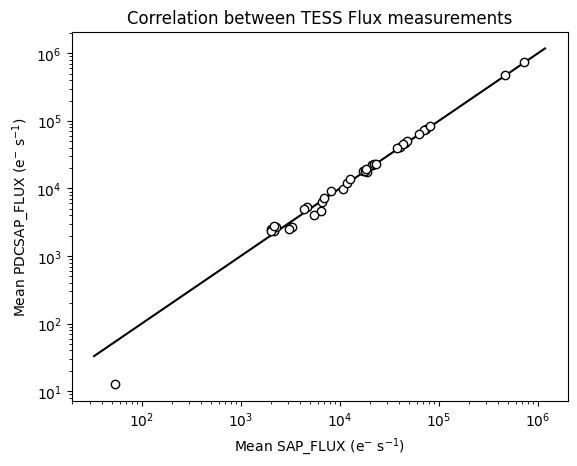

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(mean_sap_flux.values, mean_pdcsap_flux.values, "wo", mec="k")
ax.set_xscale('log')
ax.set_yscale('log')

xlim = ax.get_xlim()
ax.plot(xlim, xlim, "k", zorder=1)
ax.set_xlabel('Mean SAP_FLUX (e$^{-}$ s$^{-1}$)')
ax.set_ylabel('Mean PDCSAP_FLUX (e$^{-}$ s$^{-1}$)')
ax.set_title('Correlation between TESS Flux measurements')
plt.show()

Let's grab the first object of our catalog and plot its ZTF and TESS light curves:

In [17]:
obj = tic_ztf_tess_nested.head(n=1)
obj

,ID_tic,version_tic,HIP_tic,TYC_tic,UCAC_tic,TWOMASS_tic,SDSS_tic,ALLWISE_tic,GAIA_tic,APASS_tic,...,nobs_i_ztf,mean_mag_g_ztf,mean_mag_r_ztf,mean_mag_i_ztf,Norder_ztf,Dir_ztf,Npix_ztf,_dist_arcsec,ztf_sources,tess_sources
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
4252083925347729408,159650494,20190415,<NA>,<NA>,668-075714,19243655+4334260,<NA>,J192436.56+433426.1,2126041934308534912,52435159,...,0,13.755701,<NA>,<NA>,4,0,944,0.072676,ra dec mjd ...,TIME TIMECORR CADENCENO S...


In [18]:
lc_ztf = obj["ztf_sources"].iloc[0]
lc_ztf

,ra,dec,mjd,mag,magerr,band
0,291.152323,43.573921,59792.28775,13.751266,0.011080,g
1,291.152323,43.573921,59790.30547,13.664410,0.021021,g
2,291.152323,43.573921,59789.36549,13.703003,0.011074,g
3,291.152323,43.573921,59793.26939,13.591690,0.021231,g
4,291.152323,43.573921,59731.34885,13.478441,0.021563,g
...,...,...,...,...,...,...
937,291.152323,43.573921,59084.32782,13.791108,0.020660,g
938,291.152323,43.573921,59086.30550,13.834274,0.011093,g
939,291.152323,43.573921,58968.47656,13.702582,0.011074,g
940,291.152323,43.573921,58641.42712,13.809849,0.011089,g


In [19]:
lc_tess = obj["tess_sources"].iloc[0]
lc_tess

,TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,QUALITY,...,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2,RA_OBJ,DEC_OBJ,Norder,Dir,Npix
0,1683.350841,0.002477,328243,NaN,NaN,NaN,NaN,NaN,NaN,168,...,NaN,NaN,NaN,NaN,NaN,291.152322,43.573905,0,0,3
1,1683.352230,0.002477,328244,NaN,NaN,NaN,NaN,NaN,NaN,32,...,NaN,NaN,NaN,NaN,NaN,291.152322,43.573905,0,0,3
2,1683.353619,0.002477,328245,NaN,NaN,NaN,NaN,NaN,NaN,32,...,NaN,NaN,NaN,NaN,NaN,291.152322,43.573905,0,0,3
3,1683.355008,0.002477,328246,NaN,NaN,NaN,NaN,NaN,NaN,32,...,NaN,NaN,NaN,NaN,NaN,291.152322,43.573905,0,0,3
4,1683.356397,0.002477,328247,41669.906250,26.061264,2767.906982,10.347807,45116.964844,27.806200,0,...,0.000470,611.616922,0.000559,-0.020621,-0.045726,291.152322,43.573905,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38089,1737.405793,0.001897,367163,40584.886719,28.507828,2638.429932,15.171285,43655.886719,30.113459,0,...,0.000680,1055.835604,0.000649,-0.074696,-0.024480,291.152323,43.573905,0,0,3
38090,1737.407182,0.001897,367164,40627.015625,28.547462,2612.730957,15.227983,43561.226562,30.155325,0,...,0.000678,1055.843449,0.000649,-0.072093,-0.015222,291.152323,43.573905,0,0,3
38091,1737.408571,0.001897,367165,40597.195312,28.517141,2623.843506,15.194427,43617.417969,30.123295,0,...,0.000678,1055.838051,0.000649,-0.072178,-0.021278,291.152323,43.573905,0,0,3
38092,1737.409960,0.001897,367166,40558.445312,28.525774,2632.015381,15.211347,43606.429688,30.132414,0,...,0.000679,1055.841861,0.000650,-0.074784,-0.015604,291.152323,43.573905,0,0,3


In [20]:
ztf_mjd = lc_ztf["mjd"]
ztf_mags = lc_ztf["mag"]
tess_time = lc_tess["TIME"]
tess_flux = lc_tess["SAP_FLUX"]

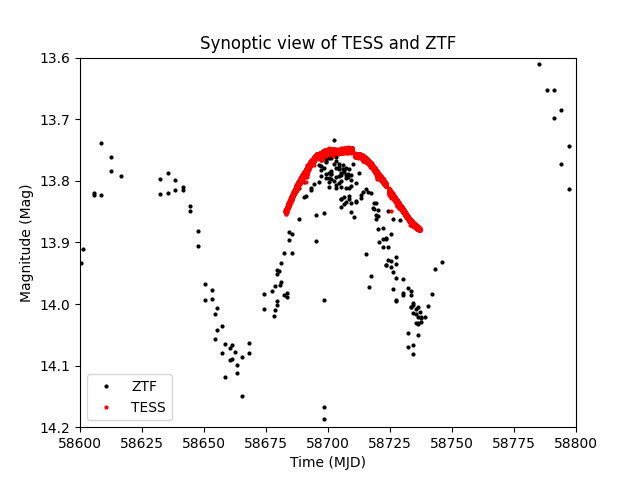

In [21]:
import matplotlib.pyplot as plt
%matplotlib widget

tess_mjd = tess_time + 56999.5
tess_mag = -2.5 * np.log10(tess_flux) + 25.4

fig, ax = plt.subplots()
ax.plot(ztf_mjd.values, ztf_mags.values, "ko", ms=2, label="ZTF")
ax.plot(tess_mjd.values, tess_mag.values, "ro", ms=2, label = "TESS")
ax.set_xlabel('Time (MJD)')
ax.set_ylabel('Magnitude (Mag)')
ax.set_title('Synoptic view of TESS and ZTF')

ax.set(xlim=(58600, 58800), ylim=(14.2, 13.6))
ax.legend()
plt.show()